# Exploratory Data Analysis (EDA) — Uruguay Census 2023

This notebook performs an initial exploratory analysis of the anonymized Uruguay Census 2023 microdata.

## Table of Contents
1. Introduction  
2. Environment Setup  
3. Data Loading & Initial Exploration  
4. Data Quality (Missing & Duplicates)  
5. Demographics (Age, Sex, Population Pyramid)  
6. Education  
7. Labor Activity  
8. Geography  
9. Key Census Cross-Tabulations  
10. Summary of Insights  

### **1. Introduction**

This notebook performs a structured Exploratory Data Analysis of the **Uruguay Census 2023 anonymized microdata** using PySpark.

The goals of this EDA are to:

- understand the structure and quality of the dataset  
- explore demographic variables  
- analyze education and labor characteristics  
- build key cross-tabulations typically used in official census analytics  

The dataset used in this analysis corresponds to:  
`personas_ext_26_02.csv` (public anonymized microdata provided by INE).



### **2. Environment Setup**


In [1]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import col, when, desc
from pyspark.sql.types import IntegerType, LongType, FloatType, DoubleType

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spark = SparkSession.builder \
    .config("spark.driver.memory", "2g") \
    .appName("MyApp") \
    .getOrCreate()

### **3. Data Loading & Variable Renaming**

In [3]:
sdf = spark.read.csv('personas_ext_26_02.csv', header=True, inferSchema=True)

In [4]:
sdf = sdf \
    .withColumnRenamed("PERNA01", "age") \
    .withColumnRenamed("PERPH02", "sex") \
    .withColumnRenamed("PERAL01", "works") \
    .withColumnRenamed("PERED03", "education") \
    .withColumnRenamed("MUNICIPIO_PAIS", "municipality")\
    .withColumnRenamed("DEPARTAMENTO", "departament")

sdf = sdf.withColumn("age", col("age").cast("int"))
sdf = sdf.withColumn("works", col("works").cast("int"))

print("Number of rows:", sdf.count())
print("Number of columns:", len(sdf.columns))


Number of rows: 3499451
Number of columns: 102


In [5]:
sdf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID_CENSO: double (nullable = true)
 |-- DIRECCION_ID: string (nullable = true)
 |-- departament: integer (nullable = true)
 |-- LOCALIDAD: integer (nullable = true)
 |-- VIVID: string (nullable = true)
 |-- HOGID: string (nullable = true)
 |-- PERID: string (nullable = true)
 |-- REGION_4: integer (nullable = true)
 |-- AREA: integer (nullable = true)
 |-- municipality: string (nullable = true)
 |-- TIPO_MUNICIPIO_PAIS: string (nullable = true)
 |-- FUENTE_EXT: integer (nullable = true)
 |-- SIT_CALLE: integer (nullable = true)
 |-- CUESTIONARIO_COMPLETO: integer (nullable = true)
 |-- CUESTIONARIO_BASICO: integer (nullable = true)
 |-- RRAA: integer (nullable = true)
 |-- UNIVERSO: integer (nullable = true)
 |-- VIVVO00: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- PERNA01_TRAMO: string (nullable = true)
 |-- PERPA01: integer (nullable = true)
 |-- PERPA02: integer (nullable = true)

In [6]:
sdf.show(5, truncate=False)

+---+--------+------------+-----------+---------+-----+-----+-----+--------+----+------------+-------------------+----------+---------+---------------------+-------------------+----+--------+-------+---+---+-------------+-------+-------+---------+-------+---------+---------+---------+---------+---------+---------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+-------+-------+-------+---------+---------+-------+-------+---------+-------+---------+---------+-------+---------+---------+-------+-------+-------+-------+-------+---------+---------+---------+---------+-------+-------+---------+-----------+---------+-----------+-------+-----+-------+-------+-------+-------+-------+-------+---------+---------+-------+---------+---------+-------+---------+---------+-------+---------+-------+--------+--------+------------------------+-----------+----------+---------------+----------+---------------+------------+-----------------+-------+------------+
|_c0|ID_CENSO|

In [7]:
print("Number of rows:", sdf.count())
print("Number of columnss:", len(sdf.columns))
print("Columns:", sdf.columns)

Number of rows: 3499451
Number of columnss: 102
Columns: ['_c0', 'ID_CENSO', 'DIRECCION_ID', 'departament', 'LOCALIDAD', 'VIVID', 'HOGID', 'PERID', 'REGION_4', 'AREA', 'municipality', 'TIPO_MUNICIPIO_PAIS', 'FUENTE_EXT', 'SIT_CALLE', 'CUESTIONARIO_COMPLETO', 'CUESTIONARIO_BASICO', 'RRAA', 'UNIVERSO', 'VIVVO00', 'sex', 'age', 'PERNA01_TRAMO', 'PERPA01', 'PERPA02', 'PERPA02_1', 'PERPA03', 'PERPA03_1', 'PERER01_1', 'PERER01_2', 'PERER01_3', 'PERER01_4', 'PERER01_5', 'PERER02', 'PERDI01', 'PERDI02', 'PERDI04', 'PERDI03', 'PERDI07', 'PERDI06', 'PERTEA', 'PEREC01', 'PEREC02', 'PEREC03', 'PEREC04', 'PERMI01', 'PERMI01_2', 'PERMI01_4', 'PERMI02', 'PERMI05', 'PERMI05_1', 'PERMI06', 'PERMI06_2', 'PERMI06_4', 'PERMI07', 'PERMI07_2', 'PERMI07_4', 'PERMI03', 'PERMI04', 'PERED00', 'PERED01', 'PERED02', 'PERED02_2', 'PERED02_4', 'education', 'PERED03_1', 'PERED04', 'PERED05', 'PERED05_1', 'PERED05_1_1', 'PERED05_2', 'PERED05_2_1', 'PERED08', 'works', 'PERAL13', 'PERAL03', 'PERAL04', 'PERAL06', 'PERAL

In [8]:
sdf.describe().show()

+-------+------------------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+------------------+------------------+------------------+------------+-------------------+------------------+--------------------+---------------------+--------------------+-------------------+------------------+------------------+-------------------+------------------+-------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+----------

### **4. Data Quality: Missing Values & Duplicates**

Missing Values

In [9]:
def missing_summary(df):
    """
    Calculate the percentage of missing values ​​per column
    in a PySpark DataFrame.

    Parameters
    ----------
    df : pyspark.sql.DataFrame
        DataFrame de entrada.

    Returns
    -------
    pandas.DataFrame
        Table with:
        - variable
        - missing_count
        - missing_rate (proportion of missing values)
        Ordered from highest to lowest percentage of missing values.
    """

    total_rows = df.count()

    missing_exprs = [
        F.sum(F.col(c).isNull().cast("int")).alias(c)
        for c in df.columns
    ]

    missing_df = df.select(missing_exprs).toPandas().T.reset_index()
    missing_df.columns = ["variable", "missing_count"]

    missing_df["missing_rate"] = missing_df["missing_count"] / total_rows

    missing_df = missing_df.sort_values("missing_rate", ascending=False)

    return missing_df

In [10]:
missing_stats = missing_summary(sdf)

missing_stats.head(15)

,variable,missing_count,missing_rate
0,_c0,0,0.0
1,ID_CENSO,0,0.0
2,DIRECCION_ID,0,0.0
3,departament,0,0.0
4,LOCALIDAD,0,0.0
5,VIVID,0,0.0
6,HOGID,0,0.0
7,PERID,0,0.0
8,REGION_4,0,0.0
9,AREA,0,0.0


Duplicates

In [11]:
duplicates_full = (
    sdf.groupBy(sdf.columns)
       .count()
       .filter(F.col("count") > 1)
)

print("Number of combinations of duplicate rows:", duplicates_full.count())
duplicates_full.show(20, truncate=False)

Number of combinations of duplicate rows: 0
+---+--------+------------+-----------+---------+-----+-----+-----+--------+----+------------+-------------------+----------+---------+---------------------+-------------------+----+--------+-------+---+---+-------------+-------+-------+---------+-------+---------+---------+---------+---------+---------+---------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+-------+-------+-------+---------+---------+-------+-------+---------+-------+---------+---------+-------+---------+---------+-------+-------+-------+-------+-------+---------+---------+---------+---------+-------+-------+---------+-----------+---------+-----------+-------+-----+-------+-------+-------+-------+-------+-------+---------+---------+-------+---------+---------+-------+---------+---------+-------+---------+-------+--------+--------+------------------------+-----------+----------+---------------+----------+---------------+------------+----------

### **5. Demographics**

Age Distribution

In [12]:
sdf.select("age").describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|           3499451|
|   mean|1007.2870181637062|
| stddev| 2099.288864007407|
|    min|                 0|
|    max|              5555|
+-------+------------------+



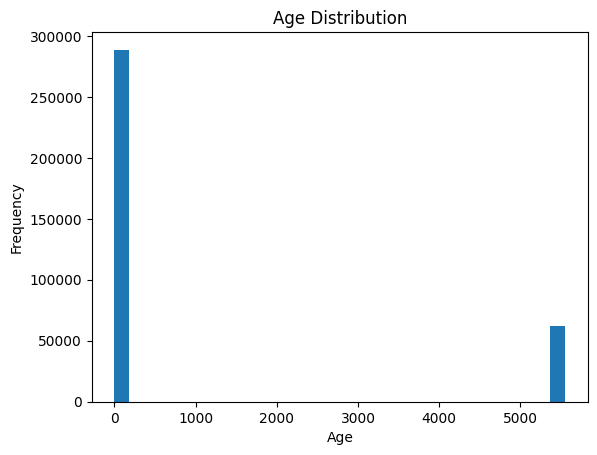

In [13]:
age_sample = sdf.select("age").dropna().sample(0.1, seed=42).toPandas()

plt.hist(age_sample["age"], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Sex Distribution

The variable **`sex`** is coded as follows:

- **1 = Male**
- **2 = Female**

In [14]:
sdf.groupBy("sex").count().orderBy(desc("count")).show()

+---+-------+
|sex|  count|
+---+-------+
|  2|1804973|
|  1|1694478|
+---+-------+



Population Pyramid

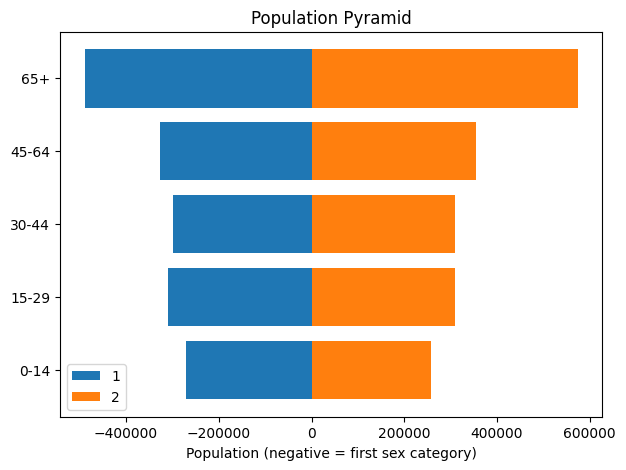

In [15]:
sdf_age = sdf.withColumn(
    "age_group",
    when(col("age") < 15, "0-14")
    .when((col("age") >= 15) & (col("age") <= 29), "15-29")
    .when((col("age") >= 30) & (col("age") <= 44), "30-44")
    .when((col("age") >= 45) & (col("age") <= 64), "45-64")
    .otherwise("65+")
)

pyr = sdf_age.groupBy("age_group", "sex").count().toPandas()
piv = pyr.pivot(index="age_group", columns="sex", values="count").fillna(0)

order = ["0-14", "15-29", "30-44", "45-64", "65+"]
piv = piv.reindex(order)

sex_categories = piv.columns.tolist()
piv_neg = piv.copy()
piv_neg[sex_categories[0]] = -piv_neg[sex_categories[0]]

plt.figure(figsize=(7, 5))
plt.barh(piv_neg.index, piv_neg[sex_categories[0]])
plt.barh(piv_neg.index, piv_neg[sex_categories[1]])
plt.xlabel("Population (negative = first sex category)")
plt.title("Population Pyramid")
plt.legend(sex_categories)
plt.show()


### **6. Education**

The variable **`education`** corresponds to the highest level of education attained.  
Values are coded as follows (Spanish labels included for reference):

- **1 = Early Childhood / Preschool Education** (*Educación Inicial o Educación Preescolar*)
- **2 = Primary Education (General)** (*Primaria común*)
- **3 = Primary Education (Special Programs)** (*Primaria especial*)
- **13 = Lower Secondary Education / Basic Cycle (Liceo or UTU)** (*Educación media básica o Ciclo Básico*)
- **14 = Upper Secondary Education / Bachillerato (Liceo or UTU)** (*Educación media superior o Bachillerato*)
- **15 = UTU Training Courses (non-accredited for Basic Cycle or Bachillerato)** (*Capacitaciones o cursos de UTU que NO acreditan Ciclo Básico NI Bachillerato*)
- **9 = Teacher Training / Magisterio / Profesorado** (*Magisterio o profesorado*)
- **10 = Non-University Tertiary Education** (*Terciario no universitario*)
- **11 = University Degree / Undergraduate Studies** (*Universidad o similar — Carrera de grado o Licenciatura*)
- **12 = Postgraduate Studies (Diploma, Master's, PhD)** (*Posgrado — diploma, maestría, doctorado*)

This coding scheme is used throughout the census dataset and should be recoded or labeled accordingly for analysis and visualization.



In [16]:
sdf.groupBy("education").agg(
    F.count("*").alias("n"),
    F.avg("age").alias("avg_age")
).orderBy(desc("education")).show(truncate=False)

+---------+-------+------------------+
|education|n      |avg_age           |
+---------+-------+------------------+
|9898     |21470  |1284.9538425710293|
|8888     |416742 |910.6106104016394 |
|7777     |2252330|1054.4590401939324|
|15       |8531   |760.9563943265737 |
|14       |133692 |915.1706085629656 |
|13       |155486 |1012.2386066912777|
|12       |11449  |499.69927504585553|
|11       |124957 |571.6640844450491 |
|10       |23025  |726.972421281216  |
|9        |21999  |950.9658166280285 |
|3        |7599   |711.1739702592446 |
|2        |251988 |1035.5281283235709|
|1        |70183  |1075.6785973811322|
+---------+-------+------------------+



### **7. Labor Activity**

The variable **`works`** indicates whether the person is currently employed.  
The coding is as follows:

- **1 = Employed** (*trabaja*)
- **2 = Not employed** (*no trabaja*)


In [17]:
sdf.groupBy("works").count().orderBy(desc("count")).show()

+-----+-------+
|works|  count|
+-----+-------+
|    1|1376490|
|    2|1264762|
| 7777| 428683|
| 8888| 413479|
| 9898|  16037|
+-----+-------+



### **8. Geography**

#### What is a *department* in Uruguay?
A **department** is the primary administrative division of Uruguay (similar to a state or province).  
The country is divided into **19 departments**, each governed by a departmental authority (*Intendencia*).

#### What is a *municipality* in Uruguay?
A **municipality** is a smaller administrative unit within a department.  
Municipalities group together towns, localities, or rural areas and are managed by local councils (*Municipios*).  
Not all areas in Uruguay are part of a municipality, but most populated zones are.


### Department Code

The variable **`department`** represents the official department code used in the 2023 Uruguay Census.  
This code ranges from **1 to 19**, covering all departments in the country.

The numbering follows this rule:

- **Code 1 corresponds to Montevideo**
- Codes **2 to 19 follow the alphabetical order** of the remaining departments

Below is the full mapping:

| Code | Department        |
|------|-------------------|
| 1    | Montevideo        |
| 2    | Artigas           |
| 3    | Canelones         |
| 4    | Cerro Largo       |
| 5    | Colonia           |
| 6    | Durazno           |
| 7    | Flores            |
| 8    | Florida           |
| 9    | Lavalleja         |
| 10   | Maldonado         |
| 11   | Paysandú          |
| 12   | Río Negro         |
| 13   | Rivera            |
| 14   | Rocha             |
| 15   | Salto             |
| 16   | San José          |
| 17   | Soriano           |
| 18   | Tacuarembó        |
| 19   | Treinta y Tres    |

In [18]:
sdf.groupBy("departament").count().orderBy(desc("departament")).show(15)

+-----------+------+
|departament| count|
+-----------+------+
|         19| 47705|
|         18| 96016|
|         17| 83684|
|         16|119718|
|         15|136195|
|         14| 80710|
|         13|109299|
|         12| 57338|
|         11|121838|
|         10|212954|
|          9| 59173|
|          8| 70324|
|          7| 26271|
|          6| 62010|
|          5|135797|
+-----------+------+
only showing top 15 rows


##### Counting the Number of Municipalities per Department

In this section, we compute **how many municipalities exist within each department** in Uruguay based on the census dataset.


In [19]:
municipios_por_departamento = (
    sdf.groupBy("departament")
       .agg(F.countDistinct("municipality").alias("distinct_municipalities"))
       .orderBy("departament")
)

municipios_por_departamento.show(30, truncate=False)

+-----------+-----------------------+
|departament|distinct_municipalities|
+-----------+-----------------------+
|1          |9                      |
|2          |5                      |
|3          |31                     |
|4          |17                     |
|5          |13                     |
|6          |4                      |
|7          |2                      |
|8          |5                      |
|9          |6                      |
|10         |9                      |
|11         |9                      |
|12         |6                      |
|13         |4                      |
|14         |6                      |
|15         |8                      |
|16         |6                      |
|17         |6                      |
|18         |5                      |
|19         |8                      |
+-----------+-----------------------+



### **9. Key Census Cross-Tabulations**

Sex × Labor

In [20]:
sdf.groupBy("sex", "works").count().orderBy(desc("count")).show()

+---+-----+------+
|sex|works| count|
+---+-----+------+
|  2|    2|751504|
|  1|    1|725437|
|  2|    1|651053|
|  1|    2|513258|
|  1| 8888|227008|
|  1| 7777|220011|
|  2| 7777|208672|
|  2| 8888|186471|
|  1| 9898|  8764|
|  2| 9898|  7273|
+---+-----+------+



Education × Labor

In [21]:
sdf.groupBy("education", "works").count().orderBy(desc("count")).show()

+---------+-----+-------+
|education|works|  count|
+---------+-----+-------+
|     7777|    1|1228643|
|     7777|    2| 905215|
|     8888| 8888| 413450|
|        2| 7777| 228320|
|       13|    2| 144151|
|     7777| 7777| 118147|
|       14|    2| 107919|
|        1| 7777|  70183|
|       11|    1|  65076|
|       11|    2|  59869|
|       14|    1|  25742|
|        2|    2|  18160|
|     9898| 9898|  15228|
|       10|    1|  13842|
|        9|    1|  12260|
|       13|    1|  10965|
|       12|    1|  10563|
|        9|    2|   9735|
|       10|    2|   9176|
|     9898| 7777|   5675|
+---------+-----+-------+
only showing top 20 rows


Age Group × Labor

In [22]:
sdf_age.groupBy("age_group", "works").count().orderBy("age_group").show()

+---------+-----+------+
|age_group|works| count|
+---------+-----+------+
|     0-14| 7777|348142|
|     0-14|    1|   150|
|     0-14| 8888| 80023|
|     0-14|    2| 98645|
|     0-14| 9898|  1507|
|    15-29|    1|242040|
|    15-29| 9898|  4456|
|    15-29|    2|279680|
|    15-29| 8888| 93205|
|    30-44|    2| 97929|
|    30-44| 9898|  2460|
|    30-44| 8888| 77127|
|    30-44|    1|429519|
|    45-64|    1|423925|
|    45-64| 9898|  2398|
|    45-64|    2|195598|
|    45-64| 8888| 58918|
|      65+|    2|592910|
|      65+| 9898|  5216|
|      65+| 7777| 80541|
+---------+-----+------+
only showing top 20 rows


# Summary of Insights

The Uruguay Census 2023 microdata used in this analysis contains **3,499,451 individuals**
and **102 variables**, providing a highly granular view of the population.

### Demographic structure

- The sex distribution is relatively balanced:
  - **Sex = 2:** 1,804,973 individuals
  - **Sex = 1:** 1,694,478 individuals
- The dataset covers the full age range, from children to older adults. Age groups built in the EDA (0–14, 15–29, 30–44, 45–64, 65+) show substantial counts in all working-age groups and in the 65+ group, which is consistent with a nationwide census.
- However, some aggregated statistics by age (e.g., mean age by education) suggest that the `age` variable, in its raw form, may include special codes or non-standard encoding that must be cleaned before drawing substantive conclusions.

### Labor activity (works)

The `works` variable (derived from PERAL01) shows the following distribution:

- **works = 1:** 1,376,490 individuals (**39.33%**)  
- **works = 2:** 1,264,762 individuals (**36.14%**)  
- **works = 7777:** 428,683 individuals (**12.25%**)  
- **works = 8888:** 413,479 individuals (**11.82%**)  
- **works = 9898:** 16,037 individuals (**0.46%**)  

This indicates that:

- The dataset includes both working and non-working populations.
- A non-trivial share of records uses special codes (7777, 8888, 9898), which need to be documented and recoded to avoid bias in downstream models.

### Education (education = PERED03)

- The education variable is **dominated by special codes**:
  - `7777`: 2,252,330 individuals  
  - `8888`: 416,742 individuals  
  - `9898`: 21,470 individuals  
- Valid education codes (e.g., 1, 2, 9, 10, 11, 13, 14, 15) represent a much smaller portion of the sample.
- The mean ages computed by education category are clearly **not interpretable in their current form** (values around 500–1,200), which strongly suggests:
  - either `age` is not yet properly coded as “years completed”, or  
  - there are additional special codes / formats that must be cleaned.

As a result, **any substantive conclusion about education levels and age must wait until a proper recoding of `age` and `education` is performed.**

### Geographic distribution

- Department and municipality frequencies show clear variation across geographic units, with some department codes having substantially higher counts than others.
- The current notebook works with **numeric codes** for departments and municipalities. To interpret geographic patterns substantively, a codebook mapping these codes to department/municipality names is needed.

### Key cross-tabulations

The EDA includes several key cross-tabulations that are useful for later modeling:

- **Sex × works:**  
  Shows how labor activity differs between sex categories, but interpretation is partially limited by the presence of 7777/8888/9898 codes in `works`.

- **Education × works:**  
  Technically computed, but difficult to interpret until:
  - education codes are mapped to their real meaning, and  
  - special codes are filtered or recoded.

- **Age group × works:**  
  Confirms that working-age groups (15–64) concentrate most of the “works = 1/2” categories, and older groups (65+) have lower participation, as expected.  
  Again, the presence of special codes suggests the need for a cleaning step before using these variables in a model.

---

### Overall conclusion

This EDA confirms that:

- The dataset is **large, rich, and suitable for big-data analytics and modeling**.
- Key demographic and labor variables (`sex`, `works`, age groups) behave in line with what one would expect from a national census.
- At the same time, several variables (especially `education` and, indirectly, `age`) are heavily affected by **special codes (7777, 8888, 9898)** and non-standard encodings, which must be carefully documented and cleaned.

The next priority before modeling should be:

1. Decode and recode **special codes** for `works`, `education`, and possibly `age`.
2. Validate the definition of the `age` variable to ensure it is truly “age in years” before using it in any model.
3. Attach **codebooks** for geographic and categorical variables (departments, municipalities, education levels).

Only after this cleaning step will the dataset be ready for robust feature engineering and machine learning.
